<a href="https://colab.research.google.com/github/shamiim611/zindi_practice_challenges/blob/main/cmu_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_validate, RandomizedSearchCV,StratifiedKFold,GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_auc_score,auc,roc_curve

In [ ]:
#explore files
data_path = "/content/drive/MyDrive/Colab Notebooks/data_cmu"
train_path = os.path.join(data_path,"train.csv")
test_path = os.path.join(data_path,"test.csv")
#load data
train_df = pd.read_csv(train_path)
print(train_df.shape)
print(train_df.CLASS.unique())
train_df.head()

(210, 20)
[0 1 2 3 4 5 6]


,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
0,123.0,152.0,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,226.0,110.0,9,0.0,0.0,0.333333,0.088889,0.500000,0.211111,1.666667,0.111111,4.444445,0.444444,-4.666666,8.333333,-3.666667,4.444445,0.977778,-2.155984,1
2,121.0,60.0,9,0.0,0.0,2.277778,2.329629,2.888889,2.874074,26.740740,24.666666,35.222220,20.333334,-6.222222,25.444445,-19.222221,35.222220,0.422300,-1.776113,2
3,96.0,84.0,9,0.0,0.0,1.500000,1.277777,1.611111,2.285188,23.851852,23.555555,30.000000,18.000000,-0.888889,18.444445,-17.555555,30.000000,0.398791,-1.598867,2
4,103.0,64.0,9,0.0,0.0,0.666667,0.699205,1.333331,0.918936,108.777780,96.333336,126.222220,103.777780,-37.333332,52.333332,-15.000000,126.222220,0.236797,-2.355443,3


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   REGION-CENTROID-COL   210 non-null    float64
 1   REGION-CENTROID-ROW   210 non-null    float64
 2   REGION-PIXEL-COUNT    210 non-null    int64  
 3   SHORT-LINE-DENSITY-5  210 non-null    float64
 4   SHORT-LINE-DENSITY-2  210 non-null    float64
 5   VEDGE-MEAN            210 non-null    float64
 6   VEDGE-SD              210 non-null    float64
 7   HEDGE-MEAN            210 non-null    float64
 8   HEDGE-SD              210 non-null    float64
 9   INTENSITY-MEAN        210 non-null    float64
 10  RAWRED-MEAN           210 non-null    float64
 11  RAWBLUE-MEAN          210 non-null    float64
 12  RAWGREEN-MEAN         210 non-null    float64
 13  EXRED-MEAN            210 non-null    float64
 14  EXBLUE-MEAN           210 non-null    float64
 15  EXGREEN-MEAN          2

In [ ]:
train_df.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
count,210.000000,210.000000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,124.647619,122.757143,9.0,0.008466,0.006349,1.925132,5.719529,2.604233,11.638377,37.091005,32.967725,44.011112,34.294180,-12.369841,20.760317,-8.390476,44.888360,0.423230,-1.340397,3.000000
std,74.104024,58.139686,0.0,0.029549,0.030077,3.158211,43.495942,4.798268,97.390023,38.677168,35.540563,43.804447,37.057003,11.559599,18.761842,11.003746,43.235182,0.227333,1.559405,2.004779
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.222220,-9.666667,-30.555555,0.000000,0.000000,-2.530950,0.000000
25%,60.500000,81.500000,9.0,0.000000,0.000000,0.666667,0.400921,0.777779,0.410816,6.453704,7.000000,8.277778,3.805555,-18.111110,4.111111,-15.750000,10.527778,0.275722,-2.187112,1.000000
50%,123.500000,121.500000,9.0,0.000000,0.000000,1.222222,0.828695,1.388889,0.913176,21.314816,18.611112,26.833334,20.000000,-10.333333,19.555556,-9.888889,28.388890,0.365455,-2.044163,3.000000
75%,189.750000,174.500000,9.0,0.000000,0.000000,1.888890,1.676634,2.597221,1.980485,52.629629,46.750000,64.194447,46.472223,-4.666666,34.333332,-3.722222,64.194447,0.539738,-1.429800,5.000000
max,252.000000,250.000000,9.0,0.111111,0.222222,25.500000,572.996400,44.722225,1386.329200,143.444440,136.888890,150.888890,142.555560,5.777778,78.777780,21.888890,150.888890,1.000000,2.864931,6.000000


In [ ]:
counts = train_df.CLASS.value_counts()
counts

,count
CLASS,
0,30
1,30
2,30
3,30
4,30
5,30
6,30


In [ ]:
#7 classes, balanced
#numerical data, sparse data(some values are 0)
#small dataset(210,20),no missing values

model

In [ ]:
#split data
X = train_df.drop(columns = 'CLASS', axis =1)
y = train_df['CLASS']
print(X.shape, y.shape)

(210, 19) (210,)


Rando forest classifier

In [ ]:
#random forest classifier
rfc = RandomForestClassifier(random_state=42,
                             n_jobs= -1,
                             n_estimators= 200,
                             max_depth= 4,
                             max_features= 'sqrt',
                             min_samples_split=10,
                             min_samples_leaf=10,)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(rfc,
                            X,
                            y,
                            cv =skf,
                            n_jobs=-1,
                            return_train_score= True,
                            scoring ='roc_auc_ovr')
print(f"rfc_train scores :{cv_results['train_score']} and mean :{np.mean(cv_results['train_score']):.3f}")
print(f"rfc_test scores :{cv_results['test_score']} and mean :{np.mean(cv_results['test_score']):.3f}")

rfc_train scores :[0.98902606 0.98824221 0.98687047 0.987589   0.98677249 0.98889542
 0.98869946 0.98811157 0.98853616 0.98778496] and mean :0.988
rfc_test scores :[0.97089947 0.98677249 0.98412698 0.97354497 0.96560847 0.98148148
 0.99470899 0.98148148 0.99470899 0.98148148] and mean :0.981


In [ ]:
# fit and evaluate the rfc
rfc.fit(X,y)
rfc_y_pred = rfc.predict_proba(X)
rf_auc = roc_auc_score(y, rfc_y_pred, multi_class= 'ovr')
print(f"rfc auc_score :{rf_auc:.4f}")

rfc auc_score :0.9879


In [ ]:
bc = BaggingClassifier(random_state=42,
                       n_estimators= 20,
                       max_features= 3,
                       max_samples=3,
                        n_jobs= -1,)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(rfc,
                            X,
                            y,
                            cv =skf,
                            n_jobs=-1,
                            return_train_score= True,
                            scoring ='roc_auc_ovr')
print(f"bc_train scores :{cv_results['train_score']} and mean :{np.mean(cv_results['train_score']):.3f}")
print(f"bc_test scores :{cv_results['test_score']} and mean :{np.mean(cv_results['test_score']):.3f}")

bc_train scores :[0.98902606 0.98824221 0.98687047 0.987589   0.98677249 0.98889542
 0.98869946 0.98811157 0.98853616 0.98778496] and mean :0.988
bc_test scores :[0.97089947 0.98677249 0.98412698 0.97354497 0.96560847 0.98148148
 0.99470899 0.98148148 0.99470899 0.98148148] and mean :0.981


In [ ]:
# fit and evaluate the model
bc.fit(X,y)
bc_y_pred = bc.predict_proba(X)
bc_auc = roc_auc_score(y, bc_y_pred, multi_class= 'ovr')
print(f"gbc auc_score :{bc_auc:.4f}")

gbc auc_score :0.8852


In [ ]:
gbc = GradientBoostingClassifier(random_state=42,
                                 learning_rate = np.float64(0.13826230550756488),
                                  max_depth = 4,
                                  max_features = None,
                                  min_samples_leaf = 13,
                                  min_samples_split = 8,
                                  n_estimators = 340,
                                  subsample = np.float64(0.7257423924305306))



skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(rfc,
                            X,
                            y,
                            cv =skf,
                            n_jobs=-1,
                            return_train_score= True,
                            scoring ='roc_auc_ovr')
print(f"gbc_train scores :{cv_results['train_score']} and mean :{np.mean(cv_results['train_score']):.3f}")
print(f"gbc_test scores :{cv_results['test_score']} and mean :{np.mean(cv_results['test_score']):.3f}")

gbc_train scores :[0.98902606 0.98824221 0.98687047 0.987589   0.98677249 0.98889542
 0.98869946 0.98811157 0.98853616 0.98778496] and mean :0.988
gbc_test scores :[0.97089947 0.98677249 0.98412698 0.97354497 0.96560847 0.98148148
 0.99470899 0.98148148 0.99470899 0.98148148] and mean :0.981


In [ ]:
#parameter space
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.6, 0.4),
}


random_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc_ovr',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y)
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation AUC:", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found: {'learning_rate': np.float64(0.13826230550756488), 'max_depth': 4, 'min_samples_leaf': 13, 'min_samples_split': 8, 'n_estimators': 340, 'subsample': np.float64(0.7257423924305306)}
Best cross-validation AUC: 0.9929365079365079


In [ ]:
# fit and evaluate the rfc
gbc.fit(X,y)
gbc_y_pred = gbc.predict_proba(X)
gbc_auc = roc_auc_score(y, gbc_y_pred, multi_class= 'ovr')
print(f"gbc auc_score :{gbc_auc:.4f}")

gbc auc_score :1.0000


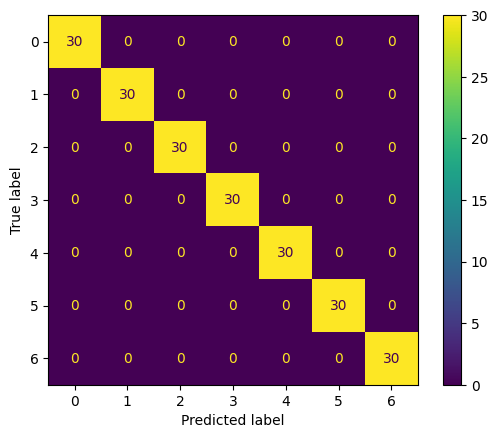

In [ ]:
#confunsion matrix
cm = confusion_matrix(y ,gbc.predict(X))
disp = ConfusionMatrixDisplay(cm)
disp.plot();

In [ ]:
test_df =  pd.read_csv(test_path)
print(test_df.shape)
test_df.head()

(2100, 20)


,id,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0,105,110,9,0.000000,0.0,0.500000,0.122222,1.944444,2.374073,4.222222,4.333334,6.333334,2.000000,0.333333,6.333334,-6.666666,6.333334,0.708333,-1.539762
1,1,36,189,9,0.000000,0.0,1.944444,2.462961,5.833334,21.588884,31.370370,28.444445,38.000000,27.666666,-8.777778,19.888890,-11.111111,38.000000,0.266302,-2.020345
2,2,252,71,9,0.000000,0.0,0.722221,0.329628,1.333333,0.711110,89.148150,72.777780,115.555560,79.111115,-49.111110,79.222220,-30.111110,115.555560,0.370097,-2.249475
3,3,10,61,9,0.111111,0.0,2.222222,3.185182,3.111111,7.185185,18.962963,18.666668,24.222221,14.000000,-0.888889,15.777778,-14.888889,24.222221,0.419522,-1.591206
4,4,7,18,9,0.000000,0.0,1.277779,0.729626,0.944445,0.374079,138.629620,133.333340,147.555560,135.000000,-15.888889,26.777779,-10.888889,147.555560,0.096352,-2.214612


In [ ]:
X_test = test_df.drop(columns = 'id',axis =1)
y_test_prob = gbc.predict_proba(X_test)
sub_file = pd.DataFrame(y_test_prob, columns=['CLASS_0','CLASS_1','CLASS_2','CLASS_3','CLASS_4','CLASS_5','CLASS_6'])
# Insert the ID column as the first column
sub_file.insert(0, 'id', test_df['id'])
sub_file.head()
#to csv
sub_file.to_csv('submission.csv', index=False)
